We have stored the NAAMES data to Azure Cloud Storage and to read it we will use the Python API. 

ifcb storage account -> naames container -> NAAMES_ml folder

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
import imageio

In [3]:
import getpass

In [4]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [6]:
import tensorflow as tf
import datetime

In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [8]:
import azure.storage.blob

In [9]:
import sys
sys.path.append('../')

In [10]:
import imp

In [11]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [61]:
import data_utils as du

In [62]:
imp.reload(du)

<module 'data_utils' from '../data_utils.py'>

In [18]:
# here we connect to the Azure blob storage
connection_string = getpass.getpass()

 ·····························································································································································································


In [19]:
container_client = azure.storage.blob.ContainerClient.from_connection_string(
    connection_string, container_name="naames"
)

In [20]:
# we limit to a subfolder to test the functionality
#blobs_list = container_client.list_blobs(name_starts_with='NAAMES_ml/D20151102T161705_IFCB107')

In [21]:
container_name = 'naames'
account_name = 'ifcbwesteurope'

In [22]:
url_prefix = f"https://{account_name}.blob.core.windows.net/{container_name}/"

In [23]:
url_prefix

'https://ifcbwesteurope.blob.core.windows.net/naames/'

In [24]:
csv_url = url_prefix + 'image-file-directory.csv'

In [25]:
inventory_df = pd.read_csv(csv_url)
inventory_df

,file_name,class_raw,high_group,missing_high_group,id,lat,long,Area,Biovolume,ConvexArea,...,ScatInt,FluoInt,ScatPeak,FluoPeak,NumberOfROIinTrigger,missing_meta_data,ESDA_exclude,excluded_1,set,binary_label
0,IFCB107D20151104T112022P00433_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T112022P00433,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
1,IFCB107D20151104T114135P00194_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00194,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
2,IFCB107D20151104T114135P00246_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00246,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
3,IFCB107D20151104T124515P00027_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T124515P00027,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
4,IFCB107D20151105T174918P00074_Dinophyceae.png,Dinophyceae,Dinoflagellate,False,IFCB107D20151105T174918P00074,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998895,IFCB107D20180412T010113P00020_Ceratium.png,Ceratium,Dinoflagellate,False,IFCB107D20180412T010113P00020,40.348,-68.296,1507.093426,20001.839825,2501.816609,...,1.09682,0.36801,3.33541,1.37789,1.0,False,False,0,train,plankton
1998896,IFCB107D20180412T012434P00137_Ditylum.png,Ditylum,Diatom,False,IFCB107D20180412T012434P00137,40.324,-68.387,4811.591696,91203.058213,6707.612457,...,3.49742,1.77298,3.35693,3.31523,1.0,False,False,0,train,plankton
1998897,IFCB107D20180412T012434P00348_Ditylum.png,Ditylum,Diatom,False,IFCB107D20180412T012434P00348,40.324,-68.387,2446.626298,30443.529921,3317.560554,...,2.46922,0.90272,3.35900,2.21282,1.0,False,False,0,train,plankton
1998898,IFCB107D20180412T021117P00330_Ceratium.png,Ceratium,Dinoflagellate,False,IFCB107D20180412T021117P00330,40.273,-68.571,1500.951557,19808.704267,2787.802768,...,0.61201,0.04541,2.85538,0.37142,1.0,False,False,0,train,plankton


In [26]:
# subsample the full dataframe for workflow testing
#df_subsample = inventory_df.iloc[:10000,]
df_subsample = inventory_df.iloc[:100000,]
#df_subsample = inventory_df

In [27]:
df_subsample

,file_name,class_raw,high_group,missing_high_group,id,lat,long,Area,Biovolume,ConvexArea,...,ScatInt,FluoInt,ScatPeak,FluoPeak,NumberOfROIinTrigger,missing_meta_data,ESDA_exclude,excluded_1,set,binary_label
0,IFCB107D20151104T112022P00433_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T112022P00433,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
1,IFCB107D20151104T114135P00194_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00194,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
2,IFCB107D20151104T114135P00246_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00246,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
3,IFCB107D20151104T124515P00027_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T124515P00027,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
4,IFCB107D20151105T174918P00074_Dinophyceae.png,Dinophyceae,Dinoflagellate,False,IFCB107D20151105T174918P00074,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,IFCB107D20151127T083440P01994_Unicellular.png,Unicellular,Other,False,IFCB107D20151127T083440P01994,42.629,-49.9175,23.356401,74.954929,28.806228,...,0.00212,-0.00030,0.01078,0.01173,1.0,False,True,1,train,plankton
99996,IFCB107D20151127T083440P02110_Unicellular.png,Unicellular,Other,False,IFCB107D20151127T083440P02110,42.629,-49.9175,26.730104,84.466671,29.584775,...,0.00219,0.00257,0.01091,0.10722,1.0,False,True,1,train,plankton
99997,IFCB107D20151127T083440P02176_Unicellular.png,Unicellular,Other,False,IFCB107D20151127T083440P02176,42.629,-49.9175,28.460208,71.208871,39.359862,...,0.00240,0.00321,0.01092,0.11352,1.0,False,True,1,train,plankton
99998,IFCB107D20151127T083440P02196_Unicellular.png,Unicellular,Other,False,IFCB107D20151127T083440P02196,42.629,-49.9175,23.788927,67.241625,27.681661,...,0.00226,0.00261,0.01094,0.13136,1.0,False,True,1,train,plankton


## create png_path column and 3-column dataframe

In [28]:
# add a column of the png path to the df dataframe
df_subsample['png_path'] = df_subsample['id'].apply(lambda row : du.buildPNGsName(row))

/tmp/ipykernel_87291/1727142688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsample['png_path'] = df_subsample['id'].apply(lambda row : du.buildPNGsName(row))


In [29]:
# create a dataframe with just the columns of png_path and high_group
df_files_labels = df_subsample[['png_path', 'high_group']]

In [30]:
# add a column called full_path 
df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join(url_prefix,'NAAMES_ml', row))

/tmp/ipykernel_87291/1825214936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join(url_prefix,'NAAMES_ml', row))


In [31]:
# THIS IS A TEST FOR SPEED OF GENERATOR ON LOCAL FILES VS BLOB
# add a column called full_path
#df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join('..', row))

In [32]:
df_files_labels

,png_path,high_group,full_path
0,D20151104T112022_IFCB107/IFCB107D20151104T1120...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
1,D20151104T114135_IFCB107/IFCB107D20151104T1141...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
2,D20151104T114135_IFCB107/IFCB107D20151104T1141...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
3,D20151104T124515_IFCB107/IFCB107D20151104T1245...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
4,D20151105T174918_IFCB107/IFCB107D20151105T1749...,Dinoflagellate,https://ifcbwesteurope.blob.core.windows.net/n...
...,...,...,...
99995,D20151127T083440_IFCB107/IFCB107D20151127T0834...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
99996,D20151127T083440_IFCB107/IFCB107D20151127T0834...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
99997,D20151127T083440_IFCB107/IFCB107D20151127T0834...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
99998,D20151127T083440_IFCB107/IFCB107D20151127T0834...,Other,https://ifcbwesteurope.blob.core.windows.net/n...


In [33]:
#labels

In [34]:
df_files_labels.full_path.iloc[0]

'https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20151104T112022_IFCB107/IFCB107D20151104T112022P00433.png'

In [35]:
# -- 
# one hot encode the labels 

lb = LabelBinarizer()
labels = set(df_files_labels.high_group)
lb.fit(list(labels))
#batch_size = 100
batch_size = 10

In [36]:
ls ..

LICENSE    __pycache__/   ml_models.py  requirements.txt
README.md  data_utils.py  notebooks/


In [37]:
imageio.imread(df_files_labels.full_path.iloc[0])

Array([[199, 198, 197, ..., 198, 198, 198],
       [197, 199, 195, ..., 198, 198, 200],
       [200, 200, 203, ..., 199, 194, 196],
       ...,
       [203, 199, 204, ..., 200, 195, 203],
       [203, 200, 201, ..., 197, 198, 198],
       [201, 201, 200, ..., 199, 199, 200]], dtype=uint8)

In [38]:
# -- 
# instantiate generators 

#imageGen = du.image_generator(df_files_labels, batch_size, lb)

In [39]:
# split the data for testing and training
train, validation = train_test_split(df_files_labels, test_size=0.2)

In [63]:
# instantiate generators 

trainGen = du.image_generator(train, batch_size, lb)
validationGen = du.image_generator(validation, batch_size, lb)

In [64]:
imageio.imread('https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151107T120416_IFCB107/IFCB107D20151107T120416P00874.png')

Array([[197, 201, 199, ..., 197, 198, 201],
       [199, 199, 198, ..., 196, 194, 198],
       [202, 199, 195, ..., 198, 200, 196],
       ...,
       [202, 199, 196, ..., 202, 204, 196],
       [201, 201, 203, ..., 203, 199, 197],
       [200, 201, 200, ..., 198, 196, 202]], dtype=uint8)

In [65]:
imageio.imread('https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20151114T170539_IFCB107/IFCB107D20151114T170539P01037.png')

Array([[164, 166, 167, ..., 167, 165, 168],
       [168, 166, 170, ..., 165, 166, 165],
       [169, 165, 170, ..., 161, 164, 167],
       ...,
       [166, 169, 168, ..., 167, 170, 171],
       [171, 172, 168, ..., 167, 168, 168],
       [167, 173, 165, ..., 164, 170, 165]], dtype=uint8)

In [42]:
#%%time
#output = next(imageGen)

In [43]:
#output[0].shape

In [44]:
#output[1].shape

In [66]:
train.shape

(80000, 3)

### define CNN model

In [46]:
import ml_models

In [47]:
imp.reload(ml_models)

<module 'ml_models' from '../ml_models.py'>

In [67]:
ml_models.create_cnn_model_A1

<function ml_models.create_cnn_model_A1(width, height, depth, filters=(32, 16, 64, 32, 128, 128, 64, 256, 256, 128), regress=False)>

In [68]:
# define and compile cnn with function 
# should do layer by layer going forward for legibility

cnn = ml_models.create_cnn_model_A1(128, 128, 1, regress=False)
x = Dense(1000, activation="relu")(cnn.output)
x = Dropout(rate=0.1)(x)
x = Dense(len(labels), activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### train model

In [69]:
totalTrain = len(train)

In [70]:
totalVal = len(validation)

In [71]:
totalTrain

80000

In [72]:
import tensorflow as tf

In [73]:
tf.test.gpu_device_name()

2022-08-09 21:40:48.089961: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla V100-PCIE-16GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2022-08-09 21:40:48.090066: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-08-09 21:40:48.090091: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-08-09 21:40:48.090112: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-08-09 21:40:48.090131: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-08-09 21:40:48.090150: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolv

''

In [74]:
# When training with Keras's Model.fit(), adding the tf.keras.callbacks.
# TensorBoard callback ensures that logs are created and stored. 
# Additionally, enable histogram computation every epoch with histogram_freq=1 (this is off by default)

#Place the logs in a timestamped subdirectory to allow easy selection of different training runs.

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-09 21:40:50.059359: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session started.
2022-08-09 21:40:50.059433: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1408] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI could not be loaded or symbol could not be found.
2022-08-09 21:40:50.059449: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1447] function cupti_interface_->ActivityRegisterCallbacks( AllocCuptiActivityBuffer, FreeCuptiActivityBuffer)failed with error CUPTI could not be loaded or symbol could not be found.
2022-08-09 21:40:50.059467: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1430] function cupti_interface_->EnableCallback( 0 , subscriber_, CUPTI_CB_DOMAIN_DRIVER_API, cbid)failed with error CUPTI could not be loaded or symbol could not be found.


In [75]:
%%time
# train model and save history object 

' training in smaller increments to monitor progress '

print("[INFO] training simple network...")
H = model.fit(
    trainGen,
    steps_per_epoch=totalTrain // batch_size,
    validation_data=validationGen,
    validation_steps=totalVal // batch_size,
    #epochs=2,
    epochs=10,
    callbacks=[tensorboard_callback])

[INFO] training simple network...
Epoch 1/10
   1/8000 [..............................] - ETA: 0s - loss: 2.8548 - accuracy: 0.0000e+00

2022-08-09 21:40:56.802211: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session started.
2022-08-09 21:40:56.802289: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1408] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI could not be loaded or symbol could not be found.
2022-08-09 21:40:56.802342: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1447] function cupti_interface_->ActivityRegisterCallbacks( AllocCuptiActivityBuffer, FreeCuptiActivityBuffer)failed with error CUPTI could not be loaded or symbol could not be found.


   2/8000 [..............................] - ETA: 1:23:04 - loss: 1.8061 - accuracy: 0.4500

2022-08-09 21:40:57.942372: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1430] function cupti_interface_->EnableCallback( 0 , subscriber_, CUPTI_CB_DOMAIN_DRIVER_API, cbid)failed with error CUPTI could not be loaded or symbol could not be found.
2022-08-09 21:40:57.943542: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:216]  GpuTracer has collected 0 callback api events and 0 activity events.
2022-08-09 21:40:57.947391: I tensorflow/core/profiler/rpc/client/save_profile.cc:168] Creating directory: logs/fit/20220809-214050/train/plugins/profile/2022_08_09_21_40_57
2022-08-09 21:40:57.949486: I tensorflow/core/profiler/rpc/client/save_profile.cc:174] Dumped gzipped tool data for trace.json.gz to logs/fit/20220809-214050/train/plugins/profile/2022_08_09_21_40_57/DataScienceVM.trace.json.gz
2022-08-09 21:40:57.950884: I tensorflow/core/profiler/utils/event_span.cc:288] Generation of step-events took 0.001 ms

2022-08-09 21:40:57.952757: I tensorflow/python/profiler/int

  91/8000 [..............................] - ETA: 1:37:20 - loss: 0.9715 - accuracy: 0.8055Failed file
https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20151107T153446_IFCB107/IFCB107D20151107T153446P00567.png
2251/8000 [=======>......................] - ETA: 1:04:18 - loss: 0.6306 - accuracy: 0.8400Failed file
https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20151110T150315_IFCB107/IFCB107D20151110T150315P00444.png
2840/8000 [=========>....................] - ETA: 56:33 - loss: 0.6151 - accuracy: 0.8414Failed file
https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20151112T181014_IFCB107/IFCB107D20151112T181014P00354.png
3233/8000 [===========>..................] - ETA: 51:57 - loss: 0.5976 - accuracy: 0.8447Failed file
https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20151114T170539_IFCB107/IFCB107D20151114T170539P02382.png
5108/8000 [==================>...........] - ETA: 31:03 - loss: 0.5460 - accuracy: 0.8547Failed file
https:/

Bad pipe message: %s [b"a\x82\x18\x04\xb0\xc8\xebFo\x1d\xd8\xba\xaa\xb3\xc8'`2 \xfa+\x86RH\x8f2m}\xed\r\xef\xda\x07\xcd\x1a%\xe7T\x97\xaal\x8c\x90&)l\xa0\xdd\xd0\x13\xf0\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00"]
Bad pipe message: %s [b'\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x14\xb4;\xcb\x1f\xd8\xbc\xf6\x96@r\x99h\xe2\x05o\xd3\xca~\x13I0']
Bad pipe message: %s [b's\xb4 B\x04!t\xf00\xe6B\xdd\x90\x9dk\xf3f\xcd -B\x87z\xaf3\xa6w\xc0\x1a\xa4\xa5\xc0\x94\xfds{\x144/\xdb\x82\xfaH\xc5\x8c\xccQ\x19\xd5&a\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x

2108/8000 [======>.......................] - ETA: 1:10:59 - loss: 0.4005 - accuracy: 0.8881Failed file
https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20151110T150315_IFCB107/IFCB107D20151110T150315P00444.png
8000/8000 [==============================] - 6226s 778ms/step - loss: 0.3939 - accuracy: 0.8887 - val_loss: 0.4657 - val_accuracy: 0.8777
Epoch 3/10
2601/8000 [========>.....................] - ETA: 31:22 - loss: 0.3709 - accuracy: 0.8964Failed file
https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20151110T150315_IFCB107/IFCB107D20151110T150315P00444.png
6488/8000 [=======================>......] - ETA: 8:45 - loss: 0.3539 - accuracy: 0.8982Failed file
https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20151114T174811_IFCB107/IFCB107D20151114T174811P01367.png
7684/8000 [===========================>..] - ETA: 1:50 - loss: 0.3499 - accuracy: 0.8992Failed file
https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20151114T195830_IFCB1


Bad pipe message: %s [b"Q\xdd'\x86J<\xfe\xaa\x80\x93\xf7@\xb6\xcav\xa68+\x00\x00\x86\xc00\xc0,\xc0(\xc0$\xc0\x14\xc0\n\x00\xa5\x00\xa3\x00\xa1\x00\x9f\x00k\x00j\x00i\x00h\x009\x008\x007\x006\xc02\xc0.\xc0*\xc0&\xc0\x0f\xc0\x05\x00\x9d\x00=\x005\xc0/\xc0+\xc0'\xc0#\xc0\x13\xc0\t\x00\xa4\x00\xa2\x00\xa0\x00\x9e\x00g\x00@\x00?\x00>\x003\x002\x001\x000\xc01\xc0-\xc0)\xc0%\xc0\x0e\xc0\x04\x00\x9c\x00<\x00/\x00\x9a\x00\x99\x00\x98\x00\x97\x00\x96\x00\x07\xc0\x11\xc0\x07\xc0\x0c\xc0\x02\x00\x05\x00\x04\x00\xff\x02\x01\x00\x00g\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x1c\x00\x1a\x00\x17\x00\x19\x00\x1c\x00\x1b\x00\x18\x00\x1a\x00\x16\x00\x0e\x00\r\x00\x0b\x00\x0c\x00\t\x00\n\x00#\x00\x00\x00\r\x00 \x00\x1e\x06\x01\x06\x02\x06\x03\x05\x01\x05\x02\x05\x03\x04\x01\x04\x02\x04\x03\x03\x01\x03\x02\x03\x03", b'\x02', b'\x03']
Bad pipe message: %s [b'\x150[\x02\x98E9\x186\xd4\xac\x998 *a5\xd9 bb\xe9\x14@\xf77\xcd\x1a\x9fw\xb0\xb3\xaal\x7fq\xa3`\xdb\xc0^\x

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

E0810 14:39:11.590087 140717883467584 program.py:298] TensorBoard could not bind to port 6008, it was already in use
ERROR: TensorBoard could not bind to port 6008, it was already in use

In [76]:
!tensorboard dev upload --logdir ./logs \
  --name 'Simple experiment with basic CNN' \
  --description 'Training results from 100k images' \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) ^C
Traceback (most recent call last):
  File "/anaconda/envs/azureml_py38/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/absl/app.py", line 312, i

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


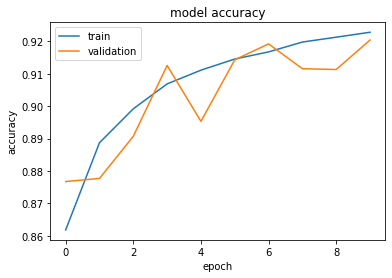

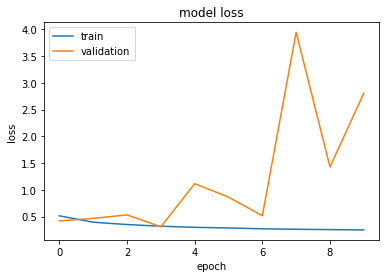

In [80]:
# plot info from model history object 

# list all data in history
print(H.history.keys())

# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [78]:
%tensorboard --logdir logs/fit 

In [81]:
# -- 
# save model weights and structure from history object / reload and make predictions 

''' save model and weights '''
model_json = model.to_json()
with open("model-test-cnn-20220809.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model-test-cnn-20220809.h5")
print("Saved model to disk")

Saved model to disk


In [82]:
# predicting with the trained model before exporting & reloading etc

test_split = np.array_split(test, 10)
test_preds = []
n = 1
for df in test_split: 
    labels = df['label'].values
    test_labels = lb.fit_transform(labels)
    v_dat = df.drop(['image_path', 'label'], axis=1).values
    image_data = []
    for i in range(len(df)): 
        row = df.iloc[i]
        input_path = row['image_path'] 
        image_data.append(preprocess_input(cv2.imread(input_path)))
        #
    test_input = np.array(image_data)
    predictions = model.predict(test_input)
    pred_frame = pd.DataFrame(predictions)
    pred_frame['image_path'] = df['image_path'].values.tolist()
    top_1 = [np.argmax(i) for i in predictions]
    df['pred_label'] = top_1
    df['true_label'] = [np.argmax(i) for i in test_labels]
    df['is_correct'] = df.apply(lambda row: is_correct(row), axis=1)
    df_out = pd.merge(df, pred_frame, on = 'image_path', how='left')
    test_preds.append(df_out)
    print('completed ' + str(n) + ' of 10 testing subsets')
    n +=1 
    del image_data



test_eval = pd.concat(test_preds)

if len(test_eval) == len(test):
    print('generated predictions for all examples in testing dataset')

NameError: name 'np' is not defined

In [20]:
#imp.reload(ml_models)

In [13]:
#account_key = input('input_account_key')

In [21]:
# attach the azure url
#blob_urls = (f"https://{account_name}.blob.core.windows.net/{container_name}/{blob.name}" for blob in blobs_list)

In [20]:
#%%time
#dataset = []
#failed_urls = []
#for blob_url in blob_urls:
    # print(blob_url)
    # select 'png'
#    if 'png' in blob_url:
#        try:
#            image = imageio.imread(blob_url)
#            dataset.append(image)
#        except Exception as e:
#            failed_urls.append(blob_url)
#            pass
        

In [22]:
#print(failed_urls)

In [23]:
#len(dataset)

In [25]:
# show an image

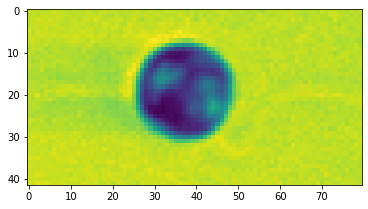

In [43]:
plt.imshow(dataset[0])

In [30]:
dataset[0]

In [15]:
image = imageio.imread('https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151102T161705_IFCB107/IFCB107D20151102T161705P00002.png')

In [17]:
image

Array([[203, 200, 200, ..., 200, 198, 200],
       [199, 200, 198, ..., 195, 199, 194],
       [201, 201, 205, ..., 200, 197, 198],
       ...,
       [205, 203, 207, ..., 197, 197, 197],
       [205, 203, 203, ..., 200, 199, 196],
       [207, 202, 209, ..., 201, 198, 199]], dtype=uint8)